In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Exploring the data

In [4]:
# checking the count of images present in the dataset
total_images = 0
root_dir = "Dataset_1/train"
for i in os.listdir(root_dir):
    print("Total no. of images present in",i,"are:",len(os.listdir(root_dir+"/"+i)))
    total_images+=len(os.listdir(root_dir+"/"+i))

Total no. of images present in Sample001 are: 40
Total no. of images present in Sample002 are: 40
Total no. of images present in Sample003 are: 40
Total no. of images present in Sample004 are: 40
Total no. of images present in Sample005 are: 40
Total no. of images present in Sample006 are: 40
Total no. of images present in Sample007 are: 40
Total no. of images present in Sample008 are: 40
Total no. of images present in Sample009 are: 40
Total no. of images present in Sample010 are: 40
Total no. of images present in Sample011 are: 40
Total no. of images present in Sample012 are: 40
Total no. of images present in Sample013 are: 40
Total no. of images present in Sample014 are: 40
Total no. of images present in Sample015 are: 40
Total no. of images present in Sample016 are: 40
Total no. of images present in Sample017 are: 40
Total no. of images present in Sample018 are: 40
Total no. of images present in Sample019 are: 40
Total no. of images present in Sample020 are: 40
Total no. of images 

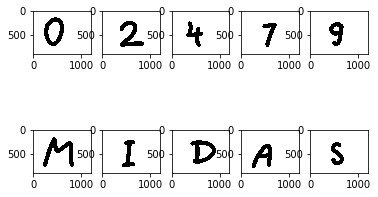

In [3]:
# plotting various images from the dataset.
plt.subplot(2, 5, 1)
plt.imshow(plt.imread("Dataset_1/train/Sample001/img001-001.png"))

plt.subplot(2,5,2)
plt.imshow(plt.imread("Dataset_1/train/Sample003/img003-002.png"))

plt.subplot(2,5,3)
plt.imshow(plt.imread("Dataset_1/train/Sample005/img005-001.png"))

plt.subplot(2,5,4)
plt.imshow(plt.imread("Dataset_1/train/Sample008/img008-002.png"))

plt.subplot(2,5,5)
plt.imshow(plt.imread("Dataset_1/train/Sample010/img010-002.png"))

plt.subplot(2,5,6)
plt.imshow(plt.imread("Dataset_1/train/Sample023/img023-001.png"))

plt.subplot(2,5,7)
plt.imshow(plt.imread("Dataset_1/train/Sample019/img019-001.png"))

plt.subplot(2,5,8)
plt.imshow(plt.imread("Dataset_1/train/Sample014/img014-001.png"))

plt.subplot(2,5,9)
plt.imshow(plt.imread("Dataset_1/train/Sample011/img011-001.png"))

plt.subplot(2,5,10)
plt.imshow(plt.imread("Dataset_1/train/Sample029/img029-002.png"))


plt.show()

(900, 1200, 3)


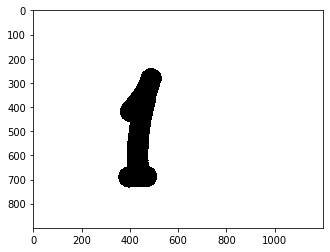

In [4]:
img = plt.imread("Dataset_1/train/Sample002/img002-001.png")
print(img.shape)
plt.imshow(img)
plt.show()

In [5]:
# checking the min and max pixel value. It is a good practise to normalize the pixel values
print("maximum pixel value of image:",img.max())
print("minimum pixel value of image:",img.min())

maximum pixel value of image: 1.0
minimum pixel value of image: 0.0


## Loading the data and assigning the labels

In [3]:
X = list() #list for storing image arrays
y = list() # list for storing the image labels

In [ ]:
# storing digits from 0 to 9 first
count = 0 # count will be used to store the respective label
for i in os.listdir(root_dir): 
    for j in os.listdir(root_dir + "/" + i): # accessing the folder
        X.append(plt.imread(root_dir+"/" + i + "/" + j)) # accessing images in the respective folder
        y.append(str(count))
    count+=1 #incrementing the count/label 
    if(count==10): break # if all the images from 0 to 9 have been stored then break out of the loop
    

400
400
0 2 9


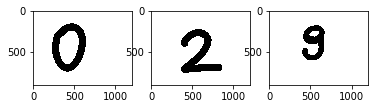

In [8]:
# sanity check
print(len(X))
print(len(y))

plt.subplot(1,3,1)
plt.imshow(X[0])

plt.subplot(1,3,2)
plt.imshow(X[80])

plt.subplot(1,3,3)
plt.imshow(X[399])


print(y[0],y[80],y[399])

In [9]:
# storing upper case alphabets (A-Z)
count = 65  #ascii value of A. We'll go till 90 i.e ascii value of Z

for i in os.listdir(root_dir)[10:]: #accessing folder after Sample010 i.e folders after the digit 9
    for j in os.listdir(root_dir + "/" + i):
        X.append(plt.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
        
    count+=1
    if(count==78): break #if we have accessed the Z folder then break the loop      

In [8]:
count = 78
for i in os.listdir(root_dir)[23:]: #accessing folder after Sample010 i.e folders after the alphabet m
    for j in os.listdir(root_dir + "/" + i):
        X.append(plt.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
        
    count+=1
    if(count==91): break #if we have accessed the Z folder then break the loop 

1440
1440
A M N Z


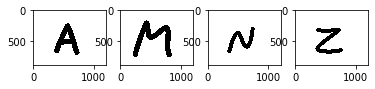

In [36]:
# sanity check
print(len(X))
print(len(y))

plt.subplot(1,4,1)
plt.imshow(X[401])

plt.subplot(1,4,2)
plt.imshow(X[880])

plt.subplot(1,4,3)
plt.imshow(X[959])


plt.subplot(1,4,4)
plt.imshow(X[1439])




print(y[401],y[880], y[959],y[1439])

In [7]:
# storing lower case alphabets (a-z)
count = 97  #ascii value of A. We'll go till 122 i.e ascii value of z

for i in os.listdir(root_dir)[36:]:#accessing folder after Sample036 i.e folders after the upper case alphabet Z
    for j in os.listdir(root_dir + "/" + i):        
        X.append(plt.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
            
        
    count+=1
    if(count==110): break #if we have accessed the z folder then break the loop  


In [6]:
count = 110
for i in os.listdir(root_dir)[49:]: #accessing folder after Sample048 i.e folders after the lower case alphabet m 
    for j in os.listdir(root_dir + "/" + i):
        X.append(plt.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
    
        
    count+=1   
    if(count==123): break #if we have accessed the z folder then break the loop     

Citations:
[1]: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/#:~:text=Normalize%20Pixel%20Values,-For%20most%20image&text=As%20such%20it%20is%20good,images%20can%20be%20viewed%20normally.
[2]: https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258#:~:text=Normalizing%20image%20inputs%3A%20Data%20normalization,faster%20while%20training%20the%20network.
[3]: https://datascience.stackexchange.com/questions/16601/reason-for-square-images-in-deep-learning